# **Checkpoint 3**
# Dataset ini diperoleh dari [Kaggle - Amazon Monitor Sales](https://www.kaggle.com/datasets/durjoychandrapaul/amazon-products-sales-monitor-dataset)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("/content/extracted_product_info_amazon_update.csv")

In [7]:
df

,Brand,Screen Size,Resolution,Aspect Ratio,Rating,Price,kategori_Harga
0,acer,23.8 Inches,FHD 1080p,16:9,4.40,94.99,Murah
1,acer,31.5 Inches,FHD 1080p,16:9,4.60,259.99,Menengah
2,acer,27 Inches,FHD 1080p,16:9,4.50,99.99,Murah
3,Sceptre,30 Inches,FHD 1080p Ultra Wide,21:9,4.50,199.97,Menengah
4,SAMSUNG,31.5 Inches,4K UHD 2160p,16:9,4.30,279.99,Menengah
...,...,...,...,...,...,...,...
292,Axis Communications,0.1 Inches,HD,1:1,4.45,46.99,Murah
293,NEC,55 Inches,FHD 1080p,16:9,4.20,450.99,Mahal
294,Elo,17 Inches,SXGA,16:9,4.45,349.99,Menengah
295,Dell,21.5 Inches,"HD, FHD 1080p",16:9,4.30,329.98,Menengah


# 1. Visualisasi Data yang Relevan dengan Business Understanding

Tujuan studi kasus: Menganalisis pola pembelian monitor di Amazon.

## Distribusi Harga Monitor

In [8]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

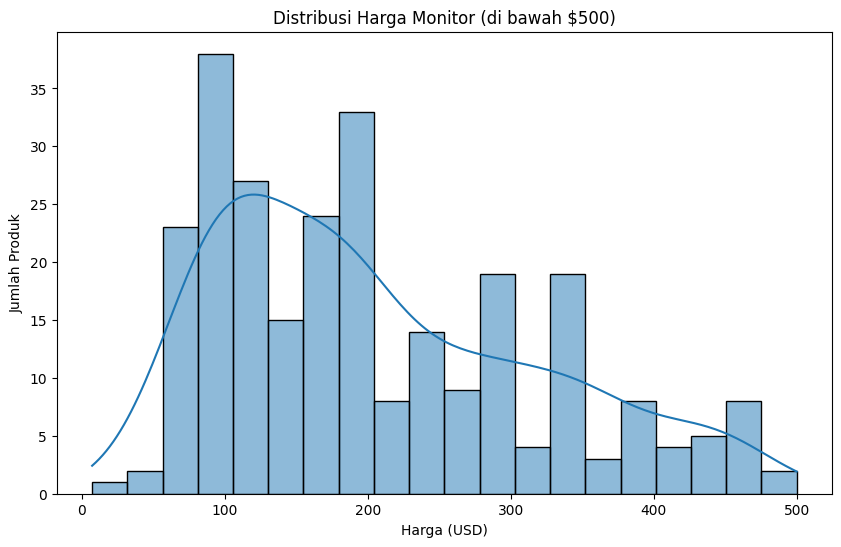

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['Price'] < 500]['Price'], bins=20, kde=True)
plt.title('Distribusi Harga Monitor (di bawah $500)')
plt.xlabel('Harga (USD)')
plt.ylabel('Jumlah Produk')
plt.show()

## Jumlah Produk per Brand

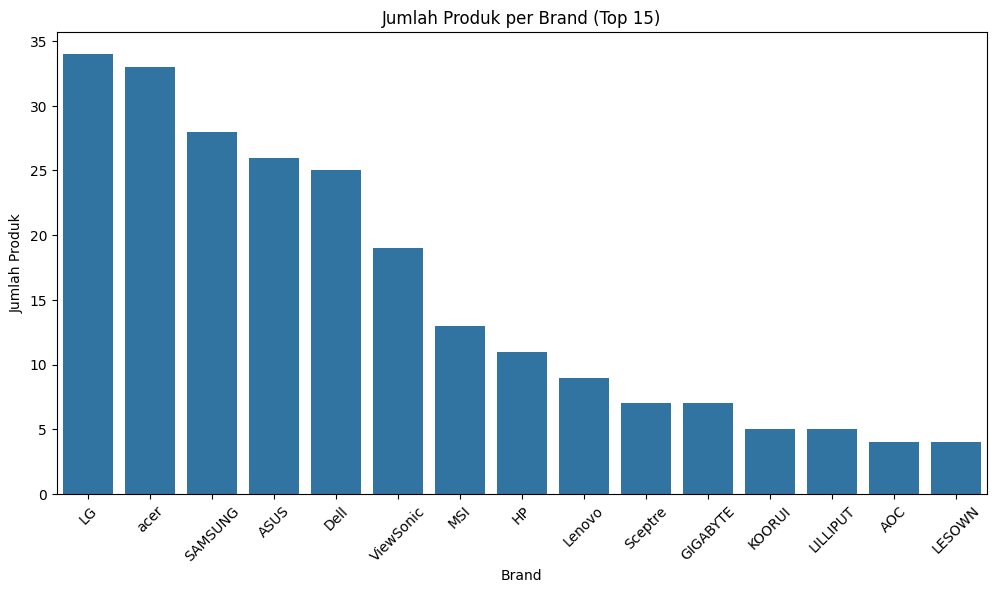

In [10]:
top_brands = df['Brand'].value_counts().nlargest(15).index
plt.figure(figsize=(12,6))
sns.countplot(data=df[df['Brand'].isin(top_brands)], x='Brand', order=top_brands)
plt.title('Jumlah Produk per Brand (Top 15)')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Produk')
plt.show()

## Boxplot Harga per Brand

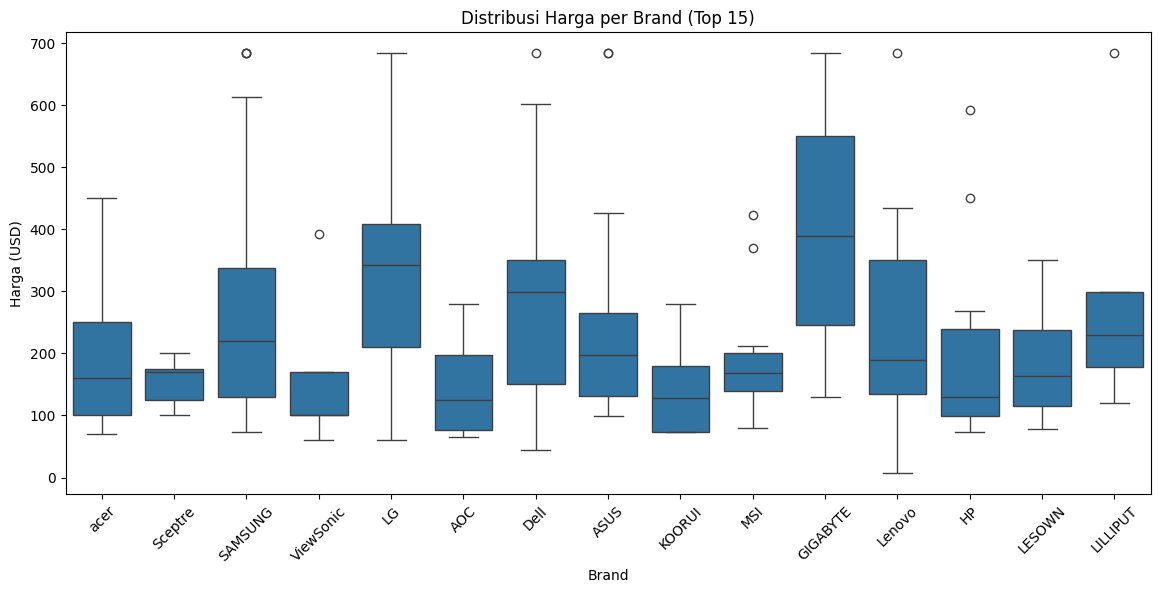

In [11]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df[df['Brand'].isin(top_brands)], x='Brand', y='Price')
plt.title('Distribusi Harga per Brand (Top 15)')
plt.xticks(rotation=45)
plt.ylabel('Harga (USD)')
plt.show()

## Jumlah Produk Berdasarkan Resolusi

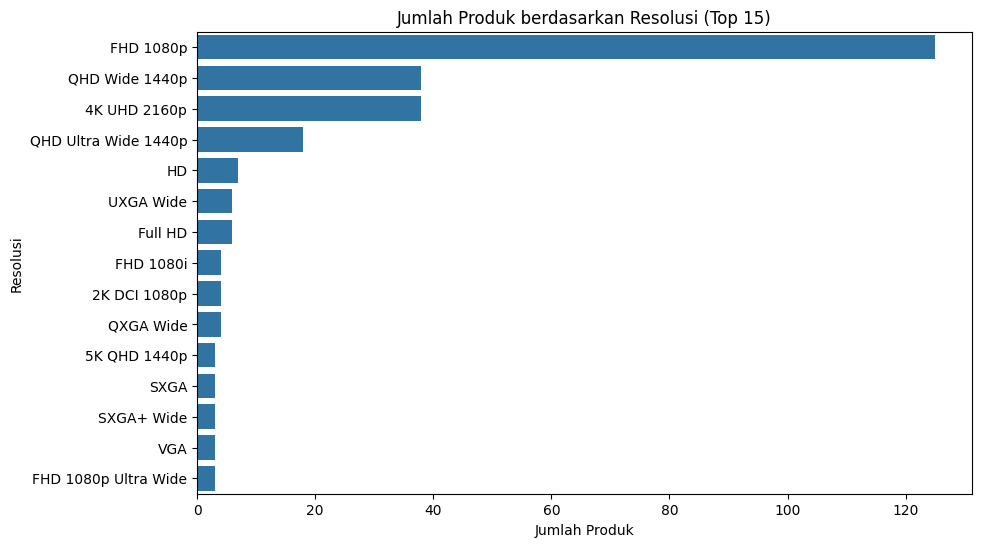

In [12]:
top_res = df['Resolution'].value_counts().nlargest(15).index
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['Resolution'].isin(top_res)], y='Resolution', order=top_res)
plt.title('Jumlah Produk berdasarkan Resolusi (Top 15)')
plt.xlabel('Jumlah Produk')
plt.ylabel('Resolusi')
plt.show()

## Harga vs Rating Produk (15 Brand saja yang ditampilkan)

In [13]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df.dropna(subset=['Rating'])

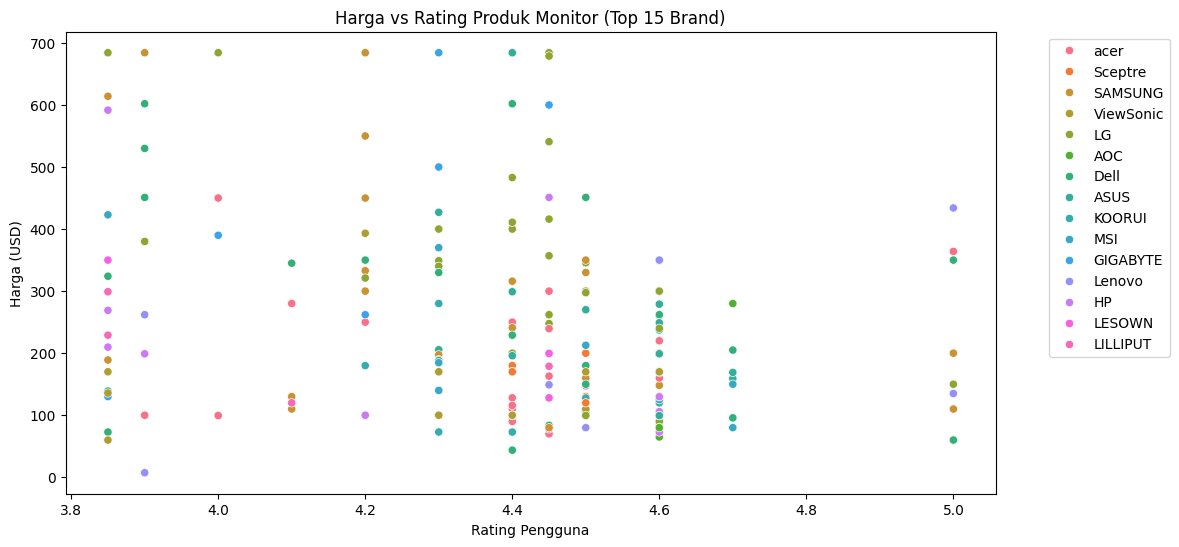

In [14]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df[df['Brand'].isin(top_brands)], x='Rating', y='Price', hue='Brand')
plt.title('Harga vs Rating Produk Monitor (Top 15 Brand)')
plt.xlabel('Rating Pengguna')
plt.ylabel('Harga (USD)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Jumlah Produk berdasarkan Kategori Harga

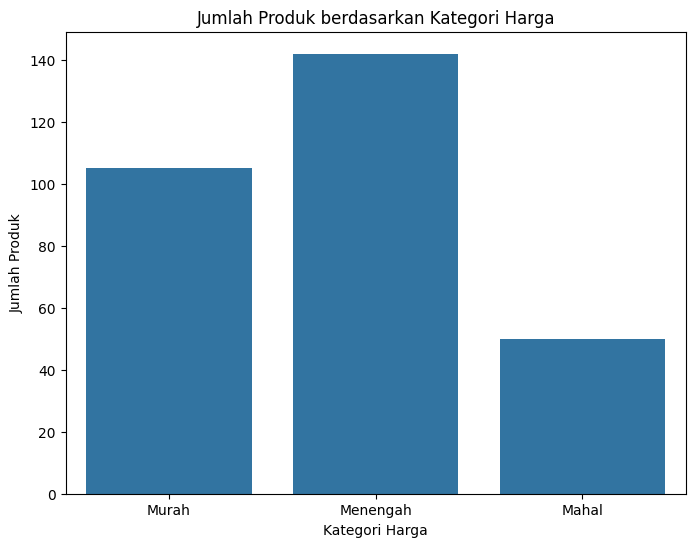

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='kategori_Harga', order=['Murah', 'Menengah', 'Mahal'])
plt.title('Jumlah Produk berdasarkan Kategori Harga')
plt.xlabel('Kategori Harga')
plt.ylabel('Jumlah Produk')
plt.show()

# 2. insight dan tindakan yang dapat diambil berdasarkan hasil visualisasi yang dibuat

1. Distribusi Harga Monitor (< 500 dollar)
*   Sebagian besar produk berada di bawah $500, menandakan pasar lebih sensitif terhadap harga.
*   Perusahaan bisa mengarahkan strategi bundling dan diskon untuk menarik konsumen di segmen harga ini.

2. Jumlah Produk per Brand
*   Brand dengan jumlah produk terbanyak menunjukkan dominasi pasar.
*   Fokus pemasaran dapat diarahkan pada brand yang paling aktif atau paling banyak menjual produk.

3. Boxplot Harga per Brand
*   Beberapa brand memiliki harga median yang jauh lebih tinggi dibandingkan lainnya, menunjukkan positioning produk premium.
*   Variasi harga yang lebar menunjukkan adanya segmen pasar yang beragam.
*   Brand dengan harga lebih rendah bisa digunakan untuk strategi promosi entry-level.

4. Produk Berdasarkan Resolusi
*   Resolusi FHD dan 4K menjadi mayoritas, menunjukkan preferensi pengguna terhadap kualitas visual yang tinggi.
*   Resolusi dapat dijadikan salah satu fitur unggulan dalam kampanye produk.

5. Harga vs Rating Produk
*   Tidak semua produk mahal mendapat rating tinggi.
*   Beberapa brand dengan harga menengah memiliki rating yang lebih baik, artinya kualitas dan kepuasan tidak selalu berbanding lurus dengan harga.
*   Evaluasi kualitas produk bisa ditingkatkan untuk memperkuat loyalitas pengguna.

6. Jumlah Produk berdasarkan Kategori Harga
*   Kategori harga Menengah mendominasi pasar, menunjukkan bahwa konsumen lebih tertarik pada monitor dengan harga moderat (150–400 dollar).
*   Kategori Murah juga masih cukup kompetitif, cocok untuk strategi bundling atau diskon awal tahun.
*   Produk Mahal jumlahnya sedikit, artinya segmen premium masih bisa digarap tetapi tidak dominan.
*   Strategi harga dan penawaran diskon bisa difokuskan ke kategori Menengah dan Murah untuk menjangkau lebih banyak konsumen.
